# Experiment 1

In this experiment, we compare the performance of the following LDA and QDA classifiers within the myoelectric
interface setups from section 2.2 (in the publication):
1. A non-adaptive DA classifier trained over a small-labeled target training set Tˆ (individual classifier).
2. A non-adaptive DA classifier trained over a small-labeled target training set Tˆ and training sets from the source
users (multi-user classifier).
3. Our adaptive DA classifier from section 2.1 (In the publication).
4. [Liu’s adaptive DA classifier](https://ieeexplore.ieee.org/abstract/document/6985518/?casa_token=H9vZpl9IcF8AAAAA:Iom6Q55n9FSn-G9CqqS6bxQzzho7vvb0OtQPdgZMQBOuNo5HwCHZSh0wddgdSp6V3q_pFsSJ).
5. [Vidovic’s adaptive DA classifier](https://ieeexplore.ieee.org/abstract/document/7302056/?casa_token=3KVFZed5PzoAAAAA:rQJutibAYMQ_Za4ZSNEee6VIR59ZlWlt9o6_MKLFY2GKq2_zgYBkFPqs5UhrFCvMyP41SBbJ).

We use three databases are: [NinaPro5](http://ninaweb.hevs.ch/), [Côté-Allard](https://github.com/UlysseCoteAllard/MyoArmbandDataset), [EPN](https://ieeexplore.ieee.org/abstract/document/8903136/?casa_token=RYo5viuh6S8AAAAA:lizIpEqM4rK5eeo1Wxm-aPuDB20da2PngeRRnrC7agqSK1j26mqmtq5YJFLive7uW083m9tT). All of them contain EMG data of hand gestures acquired by a Myo armband. The three feature sets extracted from the databases are Hahne, Hudgins, and Phinyomark sets.

*Feature Set 1 (Hahne):*
1. Logarithm of the variance (logVAR)

*Feature Set 2 (Hudgins):*
1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

*Feature Set 3 (Phinyomark):*
1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)



## Load Results

First: Import the library developed to visualize the results

In [1]:
import Experiments.Experiment1.VisualizationFunctions as VF1
import pandas as pd

Second: Load of the extraction times over the three databases

In [2]:
place='ExtractedData/'
windowSize='295'

extractionTimeEPN=pd.read_csv(place+'ExtractedDataCollectedData/timesFeatures'+windowSize+'.csv',header=None)
extractionTimeCote=pd.read_csv(place+'ExtractedDataCoteAllard/timesFeatures'+windowSize+'.csv',header=None)
extractionTimeNina5=pd.read_csv(place+'ExtractedDataNinaDB5/timesFeatures'+windowSize+'.csv',header=None)

Third: Load of the DA-based adaptation techniques' results over the three databases.

In [84]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
place='Experiments/Experiment1/ResultsExp1/'
windowSize='295'

# Nina Pro 5 database
database='Nina5'
resultsNina5,timeNina5=VF1.uploadResultsDatabases(place,database,windowSize)
resultsNina5

,Feature Set,# shots,IndLDA,IndLDAstd,IndQDA,IndQDAstd,MultiLDA,MultiLDAstd,MultiQDA,MultiQDAstd,LiuLDA,LiuLDAstd,LiuQDA,LiuQDAstd,VidLDA,VidLDAstd,VidQDA,VidQDAstd,OurLDA,OurLDAstd,OurQDA,OurQDAstd,wLDA,lLDA,wQDA,lQDA
0,1,1,0.469496,0.060965,0.422803,0.065441,0.312546,0.070921,0.311988,0.077936,0.453851,0.049627,0.475283,0.083744,0.461022,0.056204,0.425570,0.065878,0.471202,0.064744,0.505954,0.072623,0.921058,0.569883,0.866013,0.624340
1,1,2,0.521554,0.051513,0.545461,0.051622,0.323491,0.070998,0.341456,0.080460,0.486173,0.055212,0.525321,0.078764,0.508808,0.045406,0.506843,0.060067,0.520875,0.054835,0.583879,0.050606,0.951825,0.694085,0.918691,0.796141
2,1,3,0.549970,0.053120,0.601473,0.050863,0.334441,0.070649,0.369956,0.079270,0.499268,0.055004,0.546030,0.073568,0.537133,0.049720,0.553669,0.048776,0.549063,0.053389,0.621923,0.046196,0.966316,0.795921,0.952335,0.887036
3,1,4,0.575601,0.049358,0.637058,0.044869,0.344707,0.070109,0.395753,0.077023,0.509878,0.056163,0.559818,0.075246,0.558708,0.050394,0.575438,0.044523,0.575461,0.049439,0.644743,0.043549,0.980614,0.900574,0.976988,0.946159
4,2,1,0.450385,0.066422,0.377597,0.065214,0.314821,0.069246,0.287393,0.075524,0.438975,0.079625,0.412820,0.071902,0.453741,0.058942,0.448725,0.061835,0.446346,0.068083,0.443212,0.064879,0.922305,0.565100,0.720362,0.579360
5,2,2,0.518605,0.051153,0.486443,0.046113,0.326292,0.069567,0.315136,0.083908,0.476249,0.073608,0.449254,0.078110,0.517411,0.042640,0.525773,0.047754,0.509499,0.054990,0.520432,0.050189,0.952623,0.702729,0.834392,0.804553
6,2,3,0.549527,0.042896,0.553536,0.045772,0.336380,0.070198,0.335177,0.091110,0.494329,0.069708,0.469267,0.089110,0.548532,0.040565,0.564091,0.045635,0.542387,0.048025,0.567437,0.052317,0.973279,0.793065,0.904453,0.906679
7,2,4,0.576946,0.038291,0.590562,0.051153,0.346937,0.072060,0.354230,0.097943,0.508217,0.069746,0.482522,0.092739,0.569556,0.039128,0.587607,0.049158,0.572686,0.040539,0.598014,0.050961,0.987553,0.888022,0.956657,0.962839
8,3,1,0.472683,0.059148,0.416586,0.060825,0.331466,0.083437,0.326010,0.074069,0.462606,0.065280,0.459427,0.066855,0.472736,0.050524,0.438043,0.065883,0.464953,0.064747,0.476532,0.061354,0.910186,0.544462,0.737368,0.553144
9,3,2,0.534814,0.044637,0.507842,0.045683,0.342576,0.082135,0.361956,0.076631,0.501084,0.059337,0.511081,0.067064,0.527383,0.041397,0.510812,0.055721,0.526619,0.050901,0.544687,0.052423,0.951020,0.672006,0.829844,0.755531


In [80]:
# Cote-Allard database
database='Cote'
resultsCote,timeCote=VF1.uploadResultsDatabases(place,database,windowSize)
resultsCote

,Feature Set,# shots,IndLDA,IndLDAstd,IndQDA,IndQDAstd,MultiLDA,MultiLDAstd,MultiQDA,MultiQDAstd,LiuLDA,LiuLDAstd,LiuQDA,LiuQDAstd,VidLDA,VidLDAstd,VidQDA,VidQDAstd,OurLDA,OurLDAstd,OurQDA,OurQDAstd,wLDA,lLDA,wQDA,lQDA
0,1,1,0.943640,0.053431,0.914393,0.086532,0.701505,0.238031,0.732781,0.199898,0.940876,0.048241,0.904222,0.099606,0.942476,0.056406,0.872334,0.071262,0.962150,0.039487,0.953676,0.042555,0.604792,0.500250,0.618323,0.500109
1,1,2,0.957327,0.049524,0.959355,0.052859,0.715593,0.232228,0.773073,0.170238,0.952183,0.050239,0.925510,0.087370,0.952811,0.048167,0.915026,0.043341,0.966847,0.044018,0.970128,0.047870,0.731396,0.638199,0.728286,0.639465
2,1,3,0.977673,0.022352,0.976573,0.021488,0.728691,0.226035,0.825591,0.118134,0.962241,0.042114,0.943855,0.065457,0.971266,0.021481,0.938019,0.048435,0.981359,0.018941,0.983824,0.019367,0.829534,0.760006,0.829197,0.762887
3,1,4,0.981882,0.020309,0.977272,0.022945,0.741107,0.218632,0.857591,0.092089,0.965628,0.042584,0.948689,0.068327,0.978001,0.015898,0.933895,0.051514,0.984138,0.017804,0.983066,0.019779,0.916569,0.878500,0.918251,0.881166
4,2,1,0.909874,0.109100,0.818818,0.108093,0.727513,0.212953,0.715136,0.187280,0.915733,0.075071,0.906386,0.078004,0.919391,0.108805,0.855717,0.105036,0.935331,0.080158,0.937519,0.067299,0.620740,0.502726,0.641069,0.541929
5,2,2,0.945417,0.084247,0.895282,0.073392,0.748305,0.196651,0.760803,0.150154,0.923891,0.084314,0.927974,0.075004,0.945227,0.096295,0.912096,0.079487,0.951304,0.082973,0.954426,0.059298,0.755172,0.640638,0.731757,0.698164
6,2,3,0.969438,0.038156,0.922262,0.050130,0.767207,0.182514,0.797529,0.118060,0.937713,0.068967,0.940033,0.066551,0.966775,0.064826,0.934636,0.052413,0.969840,0.046105,0.962754,0.048529,0.835955,0.761898,0.824419,0.811239
7,2,4,0.978541,0.025791,0.943979,0.030199,0.784083,0.171070,0.822530,0.100187,0.947048,0.060803,0.945668,0.054501,0.982800,0.018878,0.952765,0.028002,0.980452,0.026000,0.971176,0.026728,0.919393,0.880085,0.914261,0.909220
8,3,1,0.914089,0.102151,0.901808,0.085922,0.720824,0.235403,0.759881,0.201857,0.938754,0.053922,0.910927,0.083738,0.915828,0.115327,0.871927,0.100809,0.947870,0.047134,0.952748,0.041036,0.620492,0.500203,0.608017,0.505827
9,3,2,0.942654,0.085124,0.944160,0.051821,0.739606,0.224899,0.811444,0.154473,0.947834,0.060809,0.942863,0.057258,0.939704,0.102129,0.929486,0.065380,0.962325,0.057756,0.964754,0.042666,0.744600,0.638405,0.726225,0.660818


In [81]:
# EPN database
database='EPN'
resultsEPN,timeEPN=VF1.uploadResultsDatabases(place,database,windowSize)
resultsEPN

,Feature Set,# shots,IndLDA,IndLDAstd,IndQDA,IndQDAstd,MultiLDA,MultiLDAstd,MultiQDA,MultiQDAstd,LiuLDA,LiuLDAstd,LiuQDA,LiuQDAstd,VidLDA,VidLDAstd,VidQDA,VidQDAstd,OurLDA,OurLDAstd,OurQDA,OurQDAstd,wLDA,lLDA,wQDA,lQDA
0,1,1,0.686165,0.131710,0.630271,0.107627,0.533857,0.175196,0.580119,0.144893,0.697570,0.132179,0.752834,0.118613,0.704752,0.129903,0.735736,0.120711,0.703437,0.131320,0.757732,0.116762,0.685148,0.534075,0.688496,0.521165
1,1,2,0.735432,0.132918,0.739476,0.098510,0.534449,0.175118,0.581342,0.144714,0.718829,0.130946,0.780134,0.115667,0.735477,0.127296,0.776397,0.113106,0.736877,0.126350,0.796296,0.108029,0.747729,0.590799,0.711717,0.600898
2,1,3,0.748962,0.134980,0.779787,0.104635,0.535097,0.174918,0.582900,0.143875,0.727982,0.132072,0.787558,0.119224,0.742000,0.130462,0.795827,0.113339,0.744134,0.132586,0.806938,0.110266,0.781939,0.626063,0.747019,0.652729
3,1,4,0.761555,0.127999,0.801943,0.104483,0.535648,0.174711,0.584319,0.143217,0.729871,0.128714,0.795766,0.114037,0.752873,0.121666,0.808157,0.109975,0.757044,0.119768,0.819691,0.106110,0.806083,0.647845,0.777102,0.690075
4,1,5,0.762991,0.128283,0.813814,0.103458,0.536169,0.174669,0.585422,0.142791,0.729272,0.129066,0.796465,0.114393,0.752144,0.122658,0.812133,0.106486,0.758197,0.122508,0.824210,0.103172,0.826429,0.682228,0.801990,0.722072
5,1,6,0.766549,0.127004,0.820638,0.104015,0.536694,0.174529,0.586754,0.142140,0.730997,0.128723,0.798831,0.113214,0.755750,0.121235,0.814328,0.104439,0.761093,0.123556,0.826786,0.102590,0.842285,0.703175,0.814777,0.746995
6,1,7,0.769889,0.125337,0.826622,0.103587,0.537267,0.174425,0.588119,0.141618,0.733064,0.127086,0.802123,0.111162,0.759254,0.119632,0.819496,0.100847,0.765537,0.119708,0.831924,0.101766,0.851530,0.736724,0.836752,0.768052
7,1,8,0.772781,0.122992,0.833954,0.097421,0.537830,0.174261,0.589448,0.140926,0.734392,0.125085,0.806034,0.106868,0.761411,0.117178,0.825673,0.096316,0.766484,0.119886,0.836770,0.098654,0.871771,0.749445,0.847529,0.788737
8,1,9,0.772835,0.123537,0.838562,0.098573,0.538266,0.174182,0.590562,0.140583,0.733314,0.127012,0.806688,0.108459,0.761853,0.117168,0.827644,0.098264,0.768138,0.120037,0.839406,0.099434,0.882251,0.770153,0.860167,0.807957
9,1,10,0.773819,0.123246,0.839854,0.099086,0.538769,0.174086,0.591751,0.139960,0.732833,0.127821,0.806543,0.108881,0.763406,0.116440,0.828187,0.099558,0.770356,0.118916,0.841204,0.099511,0.894422,0.786362,0.872532,0.821683


## Accuracy of the Five DA-based Classifiers vs the Number of Repetitions per Class in the Target Training Set $\hat{T}$

The following figure shows the comparison, over the three databases and the three feature sets, of the DA classifiers’ classification accuracy using the three adaption techniques and the two non-adaptive classifiers. For all classifiers, the accuracy increases as the number of repetitions in training set Tˆ increases as well. The accuracy of the individual classifier and the DA classifiers using the adaptation techniques are higher than the multi-user classifier’s accuracy. In NinaPro5 and
Côté-Allard, the classifiers’ best accuracy is obtained using the feature set 1 (Hahne set), while using the feature set 3
(Phinyomark set) in EPN. The accuracy of QDA classifiers is higher than of the LDA ones. In this figure, we can also
notice that most DA classifiers’ accuracy using our adaptation technique is higher than using the other approaches.
However, to determine if the differences between these accuracies are statistically significant, we use a one-tail Wilcoxon
signed-rank test. with a 95% of confidence ( pvalue less than 0.05)


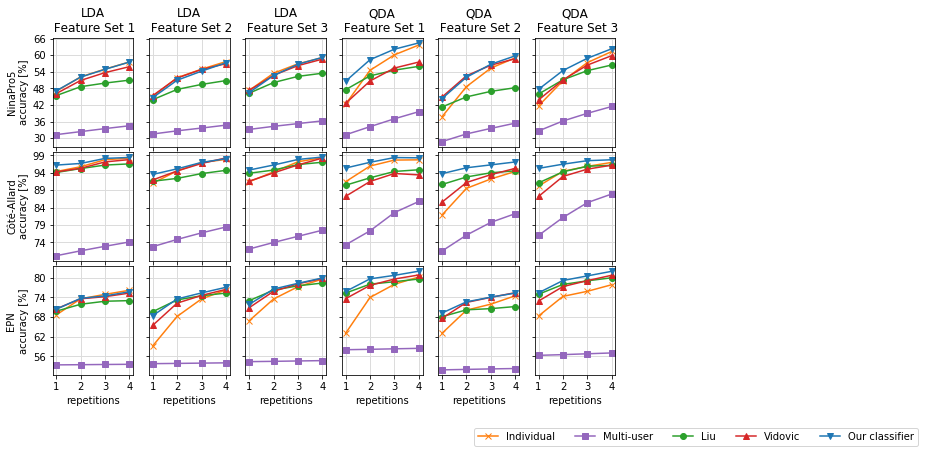

In [87]:
VF1.graphACC(resultsNina5,resultsCote,resultsEPN)

## Friedman Rank Test and Holm Post- Hoc of the DA-based Classifiers


In addition, we rank the adaptation approaches using the Friedman rank test and use the Holm post-hoc test to compare the best-ranked approach with the rest of them. The following results indicate the rank of the adaptation techniques, where our QDA classifier is the best approach, and this ranking is statistically significant with respect to the other seven classifiers.



In [5]:
place='Experiments/Experiment1/ResultsExp1/'
windowSize='295'
VF1.AnalysisFriedman(place,windowSize)



TYPE OF DA CLASSIFIER: LDA FEATURE SET: 1
Number of classifiers:  5 Number of evaluations (3(feature sets) x [10(people NinaPro5) x 4(shots) + 17(people Cote) x 4(shots) 30(people EPN) x 7(shots)]):  228 

Should we reject H0 (i.e. is there a difference in the means) at the 95.0 % confidence level? True 

Individual LDA 1: 2.3
Multi-User LDA 1: 5.0
Liu LDA 1: 3.1
Vidovic LDA 1: 2.7
Our LDA 1: 2.0

 The best classifier is:  Our LDA 1
                                          p   sig
Our LDA 1 vs Multi-User LDA 1  0.000000e+00  True
Our LDA 1 vs Liu LDA 1         1.398881e-14  True
Our LDA 1 vs Vidovic LDA 1     9.483763e-06  True
Our LDA 1 vs Individual LDA 1  4.721475e-02  True


TYPE OF DA CLASSIFIER: QDA FEATURE SET: 1
Number of classifiers:  5 Number of evaluations (3(feature sets) x [10(people NinaPro5) x 4(shots) + 17(people Cote) x 4(shots) 30(people EPN) x 7(shots)]):  228 

Should we reject H0 (i.e. is there a difference in the means) at the 95.0 % confidence level? True 

In

## Weight of the Parameters ($\hat{\omega_c}$ and $\hat{\lambda_c}$ ) in the training set $\hat{T}$

The following figure shows the average of the weights $\hat{\omega_c}$ and $\hat{\lambda_c}$, defined in section 2.1, vs. the number of repetitions per class in the training set $\hat{T}$. These two weights determine how much the parameters (the mean and the covariance) from the set $\hat{T}$ contribute to the training of a DA classifier. For the three databases, these two weights increase as the number of repetitions. Therefore, when the number of repetitions increase, the mean and the covariance of the DA classifier tend to be equal to the parameters from the training set $\hat{T}$. In table 2, most differences decrease as the number of repetitions increase because the weights $\hat{\omega_c}$ and $\hat{\lambda_c}$ tent to be equal to one.

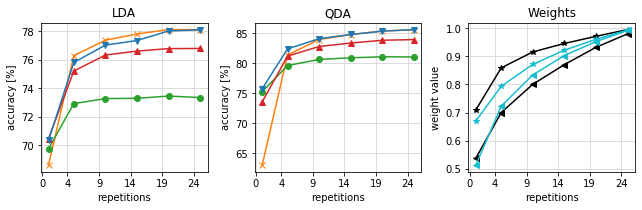

In [118]:
featureSet=1
VF1.largeDatabase(resultsEPN,featureSet)

## Response Time and Training Time of Our Myoelectric Interface using Our Adaptation Technique

We calculate the response time of this interface, which is the sum of the time of data collection and the time of analysis of collected data. The time of data collection is 295ms, which is shown in section 2.2.1 (in the publication). For our adaptation technique, the following table shows the time of analysis of collected data, which is the sum of the extraction time and the classification time. In the table, all times of analysis are less than 5ms. Therefore, our adaptive interface works in real-time because the response time is less than 300 ms. In this table, the training time of our interface using our adaptation is 5 minutes approximately in the worst case (NinaPro5 and feature set 3). All calculated times were carried out on a desktop
computer with an Intel® Core™ i5-8250U processor and 8GB of RAM.

Nina Pro 5 database

In [7]:
VF1.analysisTime(extractionTimeNina5, timeNina5)


Our LDA Technique for feature set 1
Feature set: 1
Training Time [s]:  223.08 ± 9.83
Extraction time [ms]:  0.75 ± 0.36
Classification time [ms]:  1.08 ± 0.02
Prprocessing time (min-max normalization) [µs]:  0.03 ± 0.01
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  1.83 ± 0.36

Our QDA Technique for feature set 1
Feature set: 1
Training Time [s]:  197.11 ± 3.89
Extraction time [ms]:  0.75 ± 0.36
Classification time [ms]:  1.69 ± 0.05
Prprocessing time (min-max normalization) [µs]:  0.03 ± 0.01
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  2.44 ± 0.36

Our LDA Technique for feature set 2
Feature set: 2
Training Time [s]:  273.74 ± 68.43
Extraction time [ms]:  1.0 ± 0.47
Classification time [ms]:  1.6 ± 0.02
Prprocessing time (min-max normalization) [µs]:  0.12 ± 0.03
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  2.6 ± 0.47

Our QDA Technique for feature se

Cote-Allard database

In [8]:
VF1.analysisTime(extractionTimeCote, timeCote)


Our LDA Technique for feature set 1
Feature set: 1
Training Time [s]:  28.72 ± 5.55
Extraction time [ms]:  0.39 ± 0.32
Classification time [ms]:  0.82 ± 0.45
Prprocessing time (min-max normalization) [µs]:  0.11 ± 0.39
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  1.21 ± 0.32

Our QDA Technique for feature set 1
Feature set: 1
Training Time [s]:  50.21 ± 22.19
Extraction time [ms]:  0.39 ± 0.32
Classification time [ms]:  1.33 ± 0.71
Prprocessing time (min-max normalization) [µs]:  0.11 ± 0.39
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  1.72 ± 0.32

Our LDA Technique for feature set 2
Feature set: 2
Training Time [s]:  44.59 ± 5.95
Extraction time [ms]:  0.6 ± 0.41
Classification time [ms]:  0.96 ± 0.43
Prprocessing time (min-max normalization) [µs]:  0.2 ± 0.35
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  1.56 ± 0.41

Our QDA Technique for feature set 

EPN database

In [9]:
VF1.analysisTime(extractionTimeEPN, timeEPN)


Our LDA Technique for feature set 1
Feature set: 1
Training Time [s]:  15.52 ± 4.94
Extraction time [ms]:  0.24 ± 0.31
Classification time [ms]:  0.62 ± 0.13
Prprocessing time (min-max normalization) [µs]:  0.09 ± 0.3
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  0.86 ± 0.31

Our QDA Technique for feature set 1
Feature set: 1
Training Time [s]:  29.84 ± 5.18
Extraction time [ms]:  0.24 ± 0.31
Classification time [ms]:  0.9 ± 0.23
Prprocessing time (min-max normalization) [µs]:  0.09 ± 0.3
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  1.14 ± 0.31

Our LDA Technique for feature set 2
Feature set: 2
Training Time [s]:  24.81 ± 3.94
Extraction time [ms]:  0.44 ± 0.52
Classification time [ms]:  0.83 ± 0.23
Prprocessing time (min-max normalization) [µs]:  0.28 ± 1.03
Analysis time (the sum of the extraction, classification, and preprocessing times) [ms]:  1.27 ± 0.52

Our QDA Technique for feature set 2


In [180]:
def analysisTimeTotal(extractionTimeN, timeOurTechniqueN, extractionTimeC, timeOurTechniqueC, extractionTimeE,
                      timeOurTechniqueE):

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
    classifiers=6
    vectTrainingTime = np.zeros(classifiers)
    vectTrainingTimeSTD = np.zeros(classifiers)
    vectExtractionTime = np.zeros(classifiers)
    vectExtractionTimeSTD = np.zeros(classifiers)
    vectClassificationTime = np.zeros(classifiers)
    vectClassificationTimeSTD = np.zeros(classifiers)
    vectPreprocessingTime = np.zeros(classifiers)
    vectPreprocessingTimeSTD = np.zeros(classifiers)
    vectAnalysisTime = np.zeros(classifiers)
    vectAnalysisTimeSTD = np.zeros(classifiers)
    idx=0
    for BD in ['Nina5', 'Cote', 'EPN']:
        if BD == 'Nina5':
            extractionTime = extractionTimeN
            timeOurTechnique = timeOurTechniqueN
        elif BD == 'Cote':
            extractionTime = extractionTimeC
            timeOurTechnique = timeOurTechniqueC
        elif BD == 'EPN':
            extractionTime = extractionTimeE
            timeOurTechnique = timeOurTechniqueE
        # from seconds to miliseconds
        extractionTime = extractionTime * 1000
        for DA in ['LDA', 'QDA']:
            TrainingTime = 0
            TrainingTimeSTD = 0
            ExtractionTime = 0
            ExtractionTimeSTD = 0
            ClassificationTime = 0
            ClassificationTimeSTD = 0
            PreprocessingTime = 0
            PreprocessingTimeSTD = 0
            AnalysisTime = 0
            AnalysisTimeVAR = 0
            for featureSet in range(3):
                TrainingTime += timeOurTechnique.loc[featureSet + 1, 'meanTrain' + DA] / (60*1000)
                TrainingTimeSTD += timeOurTechnique.loc[featureSet + 1, 'stdTrain' + DA] / (60*1000)
                ExtractionTime += extractionTime.loc[featureSet, :].mean()
                ExtractionTimeSTD += extractionTime.loc[featureSet, :].std()
                ClassificationTime += timeOurTechnique.loc[featureSet + 1, 'meanCl' + DA]
                ClassificationTimeSTD += timeOurTechnique.loc[featureSet + 1, 'stdCl' + DA]
                PreprocessingTime += timeOurTechnique.loc[featureSet + 1, 'meanNorm'] /1000
                PreprocessingTimeSTD += timeOurTechnique.loc[featureSet + 1, 'stdNorm']
                AnalysisTime += extractionTime.loc[featureSet, :].mean() + timeOurTechnique.loc[
                    featureSet + 1, 'meanCl' + DA] + timeOurTechnique.loc[featureSet + 1, 'meanNorm'] / 1000
                AnalysisTimeVAR += np.sqrt((extractionTime.loc[featureSet, :].var() + timeOurTechnique.loc[
                    featureSet + 1, 'varCl' + DA] + timeOurTechnique.loc[featureSet + 1, 'varNorm'] / 1000))
            vectTrainingTime[idx] = TrainingTime/3
            vectTrainingTimeSTD[idx] = TrainingTimeSTD/3
            vectExtractionTime[idx] = ExtractionTime/3
            vectExtractionTimeSTD[idx] = ExtractionTimeSTD/3
            vectClassificationTime[idx] = ClassificationTime/3
            vectClassificationTimeSTD[idx] = ClassificationTimeSTD/3
            vectPreprocessingTime[idx] = PreprocessingTime/3
            vectPreprocessingTimeSTD[idx] = PreprocessingTimeSTD/3
            vectAnalysisTime[idx] = AnalysisTime/3
            vectAnalysisTimeSTD[idx] = AnalysisTimeVAR/3
            idx+=1

    print('Training Time [min]',vectTrainingTime)
    print('Training Time [min] STD',vectTrainingTimeSTD,'\n\n\n')
    print('Feature extraction Time [ms]',vectExtractionTime)
    print('Feature extraction Time [ms] STD',vectExtractionTimeSTD)
    print('Pre-processing Time [ms]',vectPreprocessingTime)
    print('Pre-processing Time [ms] STD',vectPreprocessingTimeSTD)
    print('Classification Time [ms]',vectClassificationTime)
    print('Classification Time [ms] STD',vectClassificationTimeSTD)
    print('Data-Analysis Time [ms]',vectAnalysisTime)
    print('Data-Analysis Time [ms] STD',vectAnalysisTimeSTD,'\n')

    xAxis = np.arange(classifiers)  # the x locations for the groups
    width = 0.5  # the width of the bars: can also be len(x) sequence
    ax[0].grid(color='gainsboro', linewidth=1)
    ax[0].set_axisbelow(True)

    vectPreprocessingTime*=300
    ax[0].bar(xAxis, vectExtractionTime, width, label='Feature-extraction Time')
    ax[0].bar(xAxis, vectPreprocessingTime, width, bottom=vectExtractionTime, label='Pre-processing Time')
    ax[0].bar(xAxis, vectClassificationTime, width, bottom=vectExtractionTime+vectPreprocessingTime, yerr=vectAnalysisTimeSTD, label='Classification Time')

    ax[0].set_xlabel('Our classifiers over the three databases')
    ax[0].set_ylabel('time (ms)')
    ax[0].set_title('Data-Analysis Time')
    ax[0].set_xticks(xAxis)
    ax[0].set_xticklabels(['LDA_Nina5', 'QDA_Nina5', 'LDA_Cote', 'QDA_Cote', 'LDA_EPN','QDA_EPN'],rotation=20)
    # ax[0].legend(loc='lower center', bbox_to_anchor=(2, -0.7), ncol=5)


    ax[1].grid(color='gainsboro', linewidth=1)
    ax[1].set_axisbelow(True)

    ax[1].bar(xAxis, vectTrainingTime, width,yerr=vectTrainingTimeSTD, label='Training Time',color='tab:red')
    ax[1].set_xlabel('Our classifiers over the three databases')
    ax[1].set_ylabel('time (min)')
    ax[1].set_title('Our classifiers\' Training Time')
    ax[1].set_xticks(xAxis)
    ax[1].set_xticklabels(['LDA_Nina5', 'QDA_Nina5', 'LDA_Cote', 'QDA_Cote', 'LDA_EPN','QDA_EPN'],rotation=20)
    # ax[1].legend(loc='lower center', bbox_to_anchor=(2, -0.7), ncol=5)

    fig.tight_layout(pad=1)
    plt.savefig("times.png", bbox_inches='tight', dpi=600)

    plt.show()

Training Time [min] [3.86495206 4.07409078 0.6581855  0.852251   0.36578678 0.57611922]
Training Time [min] STD [0.46510233 0.06966617 0.10198678 0.41811383 0.07265967 0.13334711] 



Feature extraction Time [ms] [1.37704812 1.37704812 0.7568258  0.7568258  0.52298427 0.52298427]
Feature extraction Time [ms] STD [0.56352801 0.56352801 0.44635791 0.44635791 0.46574528 0.46574528]
Pre-processing Time [ms] [9.00000000e-05 9.00000000e-05 1.63333333e-04 1.63333333e-04
 2.03333333e-04 2.03333333e-04]
Pre-processing Time [ms] STD [0.02       0.02       0.31666667 0.31666667 0.61666667 0.61666667]
Classification Time [ms] [1.42       2.08       0.92333333 1.29666667 0.75333333 1.02      ]
Classification Time [ms] STD [0.02       0.03666667 0.51       0.63666667 0.19666667 0.31      ]
Data-Analysis Time [ms] [2.79713812 3.45713812 1.68032247 2.0536558  1.27652094 1.5431876 ]
Data-Analysis Time [ms] STD [0.56352801 0.56352801 0.44635791 0.44635791 0.46574528 0.46574528] 



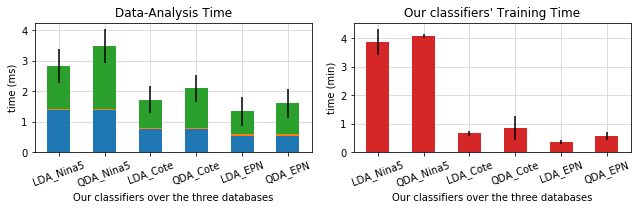

In [181]:
analysisTimeTotal(extractionTimeNina5, timeNina5, extractionTimeCote, timeCote, extractionTimeEPN,
                      timeEPN)